# VAEX

Vaex is a high performance Python library for lazy Out-of-Core DataFrames (similar to Pandas), to visualize and explore big tabular datasets. It calculates statistics such as mean, sum, count, standard deviation etc, on an N-dimensional grid for more than a billion (10^9) samples/rows per second. Visualization is done using histograms, density plots and 3d volume rendering, allowing interactive exploration of big data. Vaex uses memory mapping, zero memory copy policy and lazy computations for best performance (no memory wasted).

- https://pypi.org/project/vaex/

    
- https://vaex.readthedocs.io/en/latest/


- https://vaex.readthedocs.io/en/latest/guides/advanced_plotting.html#


- https://vaex.readthedocs.io/en/latest/datasets.html


- https://vaex.io/


- https://www.geeksforgeeks.org/introduction-to-vaex-in-python/


Analyzing 1.1 Billion NYC Taxi and Uber Trips

- https://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/

In [ ]:
# Installation

# !pip install vaex

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Automate EDA

import vaex

## Load Crimes_2001_2023 Dataset

In [10]:
%%time
df = vaex.open(r"C:\Users\ariel\OneDrive\Desktop\CCT College\GitHub\Automated EDA\Datasets\Crimes\Crimes_2001_to_2023.csv")

Wall time: 354 ms


In [11]:
%%time
df

Wall time: 0 ns


#,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1,42,32,11,--,--,2015,08/01/2017 03:52:26 PM,--,--,
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25,36,19,11,--,--,2018,04/06/2019 04:04:43 PM,--,--,
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,,False,False,824,8,15,63,11,--,--,2016,04/06/2019 04:04:43 PM,--,--,
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17,33,14,08A,--,--,2018,04/06/2019 04:04:43 PM,--,--,
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22,21,71,11,--,--,2014,04/06/2019 04:04:43 PM,--,--,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,955,915",12131776,JD327752,08/10/2020 08:30:00 PM,066XX S SACRAMENTO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,831,8,17,66,05,1157527,1860392,2020,08/17/2020 03:41:32 PM,41.772671069,-87.698104059,"(41.772671069, -87.698104059)"
"7,955,916",12082414,JD269218,06/18/2020 09:00:00 PM,093XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,633,6,9,49,06,1180558,1843036,2020,06/25/2020 03:41:40 PM,41.724546436,-87.614210743,"(41.724546436, -87.614210743)"
"7,955,917",12118237,JD311791,07/27/2020 03:02:00 PM,033XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1134,11,24,27,08B,1154169,1896171,2020,08/03/2020 03:41:51 PM,41.870920735,-87.709461362,"(41.870920735, -87.709461362)"
"7,955,918",12142591,JD340297,08/14/2020 03:00:00 PM,023XX W ROSEMONT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2413,24,50,2,07,1159419,1941765,2020,08/26/2020 03:40:41 PM,41.995927389,-87.688928533,"(41.995927389, -87.688928533)"


### A single plot
The simplest case is a single heatmap created by two axes, specified by the first two arguments:

Number of Rows: 7,955,920
Number of Columns: 22


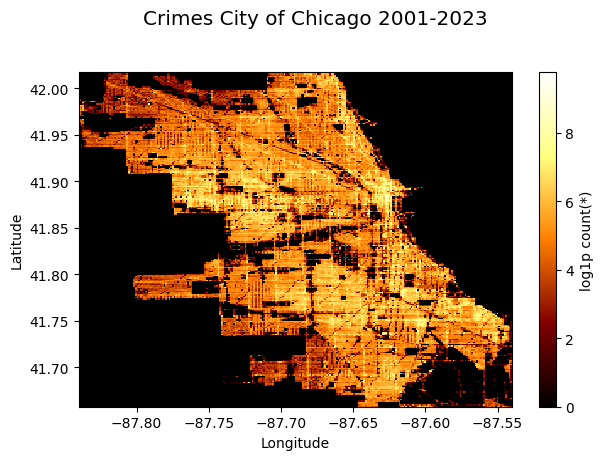

In [12]:
print(f'Number of Rows: {df.shape[0]:,}')
print(f'Number of Columns: {df.shape[1]:,}')

df.viz.heatmap('Longitude', 'Latitude', title='Crimes City of Chicago 2001-2023',
               limits='99%', f="log1p", show=True);           

### New York taxi dataset


Year: 2015 - 146 million rows - 12GB

In [2]:
%%time
df_taxi = vaex.open('s3://vaex/taxi/yellow_taxi_2015_f32s.hdf5?anon=true')

Wall time: 57.9 s


In [3]:
%%time
df_taxi

Wall time: 0 ns


#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-12-16 02:26:00.000000000,2014-12-16 02:28:00.000000000,1,CSH,1.09,-73.986725,40.75642,1.0,nan,-73.99646,40.742893,5.0,0.5,0.5,0.0,0.0,6.0
1,VTS,2014-12-15 18:23:00.000000000,2014-12-15 18:58:00.000000000,2,,6.28,-74.00419,40.72119,1.0,nan,-73.97,nan,nan,nan,nan,nan,nan,nan
2,VTS,2015-01-15 19:05:39.000000000,2015-01-15 19:23:42.000000000,1,1,1.59,-73.9939,40.75011,1.0,0.0,-73.974785,40.750618,12.0,1.0,0.5,3.25,0.0,17.05
3,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:53:28.000000000,1,1,3.3,-74.00165,40.724243,1.0,0.0,-73.994415,40.75911,14.5,0.5,0.5,2.0,0.0,17.8
4,CMT,2015-01-10 20:33:38.000000000,2015-01-10 20:43:41.000000000,1,2,1.8,-73.96334,40.802788,1.0,0.0,-73.95182,40.824413,9.5,0.5,0.5,0.0,0.0,10.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"146,112,986",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2,-73.99381,40.72087,1.0,0.0,-73.98621,40.72247,7.5,0.5,0.5,1.76,0.0,10.56
"146,112,987",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527,40.76028,1.0,0.0,-73.939514,40.752388,7.5,0.5,0.5,0.0,0.0,8.8
"146,112,988",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.8,-73.9873,40.73908,1.0,0.0,-73.98867,40.6933,13.5,0.5,0.5,0.0,0.0,14.8
"146,112,989",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.96,-73.99756,40.725693,1.0,0.0,-74.01712,40.705322,8.5,0.5,0.5,0.0,0.0,9.8


In [4]:
%%time
print(f'Number of Rows: {df_taxi.shape[0]:,}')
print(f'Number of Columns: {df_taxi.shape[1]}')

Number of Rows: 146,112,991
Number of Columns: 18
Wall time: 0 ns


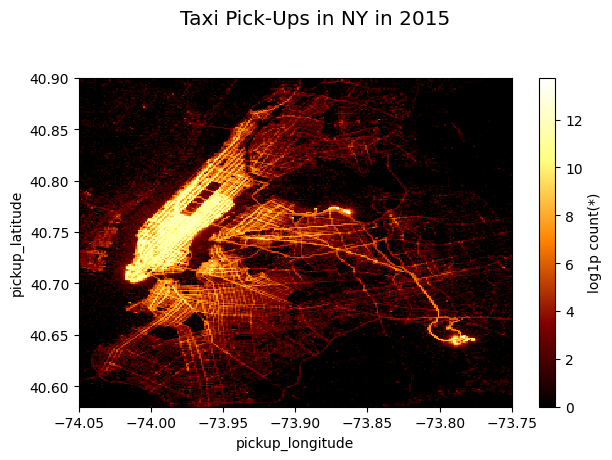

In [9]:
# Pick-Ups

df_taxi.viz.heatmap('pickup_longitude', 'pickup_latitude',limits=[[-74.05, -73.75], [40.58, 40.90]],
                    f='log1p', title='Taxi Pick-Ups in NY in 2015' ,show=True);

Wall time: 0 ns


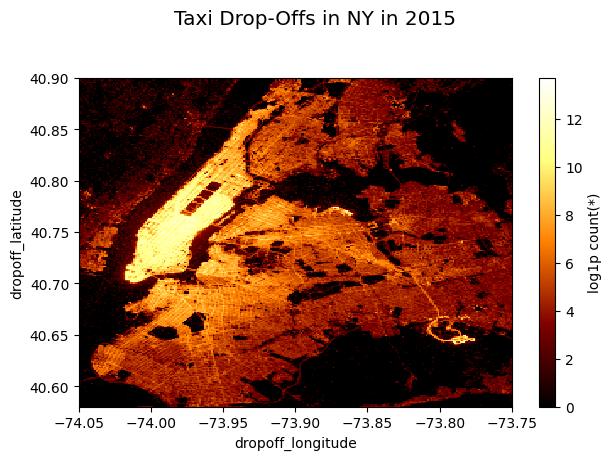

In [7]:
# Drop-Offs

df_taxi.viz.heatmap('dropoff_longitude', 'dropoff_latitude',limits=[[-74.05, -73.75], [40.58, 40.90]],
                    f='log1p', title='Taxi Drop-Offs in NY in 2015', show=True);